<a href="https://colab.research.google.com/github/alejandromunizsiques/Nuevo-repositorio/blob/main/Ejercicio_sobre_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion de la tarea

Tu tarea es realizar la segmentación de clientes utilizando KMeans. Nos interesa agrupar a nuestros clientes en grupos basados en características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de forma eficaz. Usaremos la edad del cliente, los años de educación en el empleo, los ingresos, la deuda, si incumplieron y la relación deuda: ingresa el índice para separarlos por segmentos. Puedes descargar los datos aquí. Los datos originales provienen de esta fuente.

# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Montaje del dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Introducción al Machine Learning/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


# Data Cleaning


In [22]:
Info_Segmentacion = df.drop(columns={"Unnamed: 0"})
Info_Segmentacion = Info_Segmentacion.assign(Total_debt = Info_Segmentacion[['Card Debt','Other Debt']].sum(axis = 1))
Info_Segmentacion = Info_Segmentacion.drop(columns={"Card Debt","Other Debt"},axis = 1)
Info_Segmentacion = Info_Segmentacion.dropna()
Info_Segmentacion

,Customer Id,Age,Edu,Years Employed,Income,Defaulted,DebtIncomeRatio,Total_debt
0,1,41,2,6,19,0.0,6.3,1.197
1,2,47,1,26,100,0.0,12.8,12.800
2,3,33,2,10,57,1.0,20.9,11.913
3,4,29,2,4,19,0.0,6.3,1.197
4,5,47,1,31,253,0.0,7.2,18.216
...,...,...,...,...,...,...,...,...
844,845,41,1,7,43,0.0,4.4,1.892
846,847,28,2,7,34,0.0,7.0,2.380
847,848,25,4,0,18,1.0,33.4,6.012
848,849,32,1,12,28,0.0,2.9,0.812


# Estandarizacion y escalamiento

In [20]:
Scaler = StandardScaler()

Scaled_df = Scaler.fit_transform(Info_Segmentacion)

# K-Means

In [24]:
Segmentacion = KMeans(n_clusters=3)
Segmentacion.fit(Scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Clusters (Deuda - años trabajando

Text(0.5, 1.0, 'Cluster Años trabajando-Deuda')

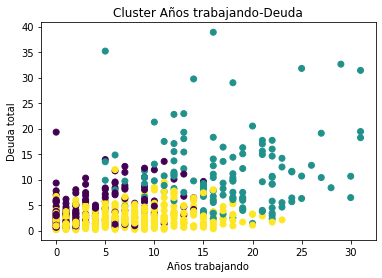

In [25]:
Info_Segmentacion["clusters"]= Segmentacion.labels_

plt.scatter(Info_Segmentacion["Years Employed"],Info_Segmentacion["Total_debt"],c = Info_Segmentacion["clusters"])
plt.xlabel('Años trabajando')
plt.ylabel('Deuda total')
plt.title('Cluster Años trabajando-Deuda')

# Cluster Años de educacion-Ingreso 

Text(0.5, 1.0, 'Cluster Años Educacion-Ingreso')

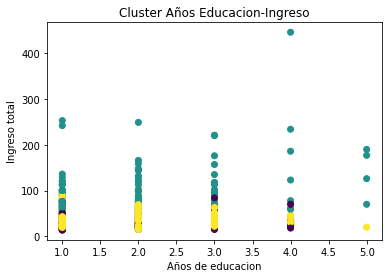

In [26]:
plt.scatter(Info_Segmentacion["Edu"],Info_Segmentacion["Income"],c = Info_Segmentacion["clusters"])
plt.xlabel('Años de educacion')
plt.ylabel('Ingreso total')
plt.title('Cluster Años Educacion-Ingreso')

# Sección nueva